<a href="https://colab.research.google.com/github/Sahil7151/my_data_science_project/blob/main/EDA_on_Top_Selling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/bestsellers with categories.csv')

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
data.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [12]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
data["Price"].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [6]:
data["Reviews"].describe()

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

In [11]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
data.shape

(550, 7)

In [9]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [10]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [16]:
data.median()

<ipython-input-16-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

In [17]:
data.max()

Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object

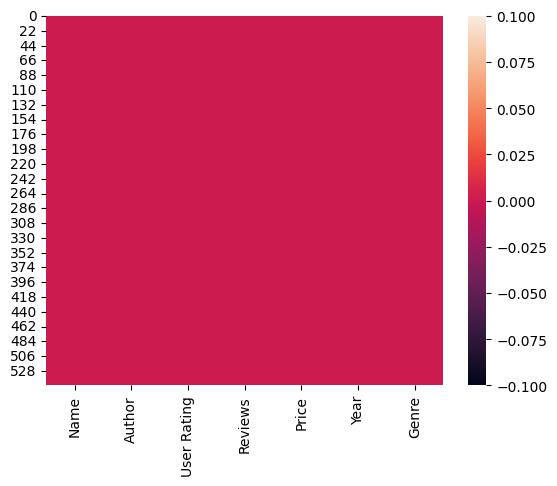

In [19]:
sns.heatmap(data.isnull())
plt.show()

<Axes: ylabel='Year'>

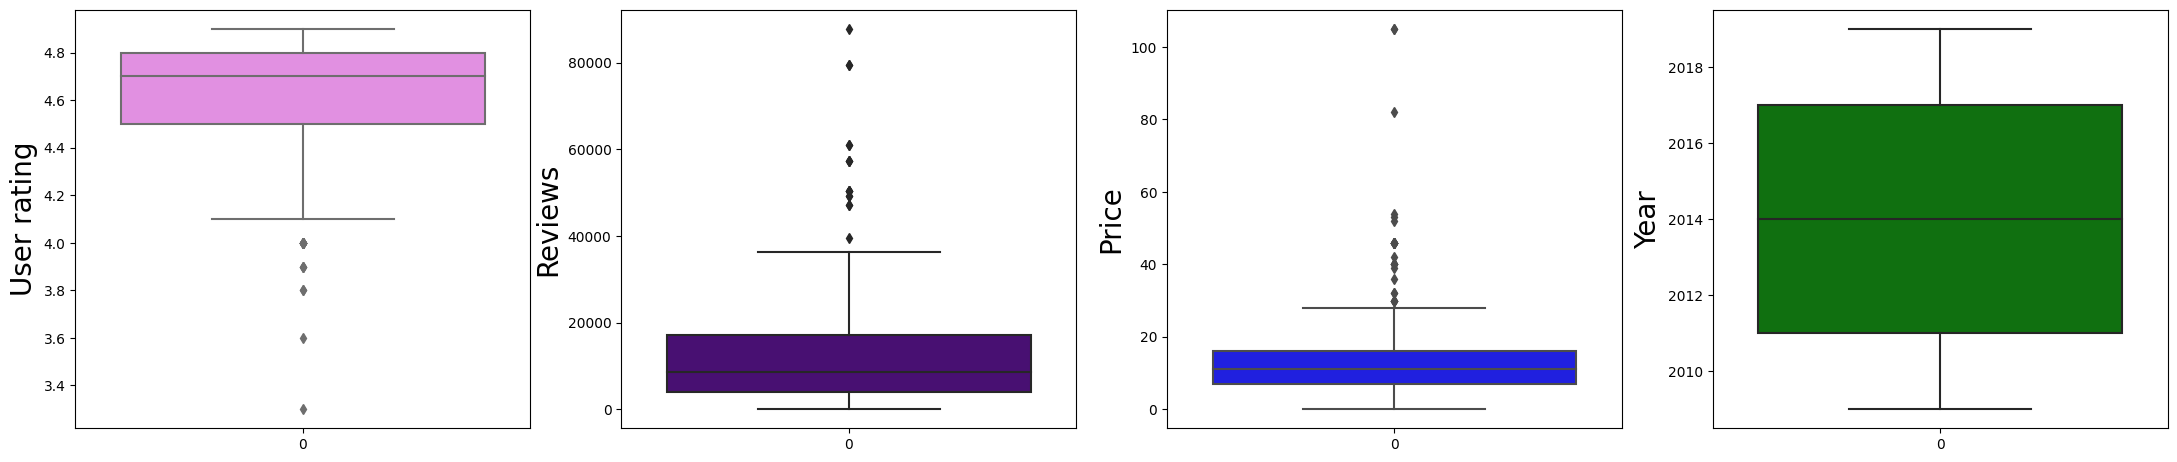

In [29]:
plt.figure(figsize=(27,25))
plt.subplot(4,4,1)
plt.ylabel("User rating",fontsize=20)
sns.boxplot(data['User Rating'],color='violet')

plt.subplot(4,4,2)
plt.ylabel("Reviews",fontsize=20)
sns.boxplot(data['Reviews'],color='indigo')

plt.subplot(4,4,3)
plt.ylabel("Price",fontsize=20)
sns.boxplot(data['Price'],color='blue')

plt.subplot(4,4,4)
plt.ylabel("Year",fontsize=20)
sns.boxplot(data['Year'],color='Green')

In [31]:
data['Price'] = data['Price'].clip(lower=data['Price'].quantile(0.05),upper=data['Price'].quantile(0.95))

In [32]:
data['Reviews'] = data['Reviews'].clip(lower=data['Reviews'].quantile(0.05),upper=data['Reviews'].quantile(0.95))
data['User Rating'] = data['User Rating'].clip(lower=data['User Rating'].quantile(0.05),upper=data['User Rating'].quantile(0.95))

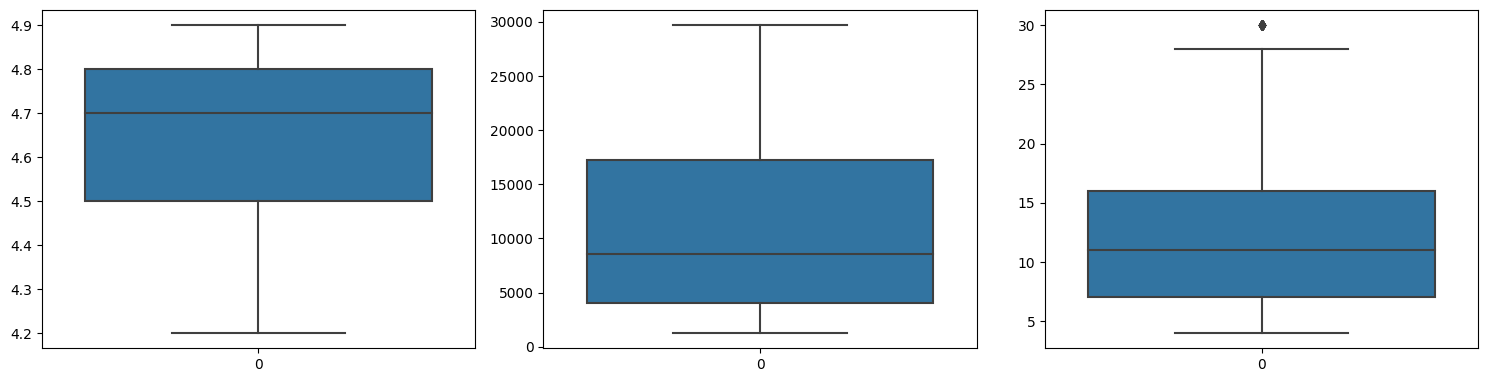

In [35]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

plt.tight_layout()

<Axes: xlabel='Year', ylabel='count'>

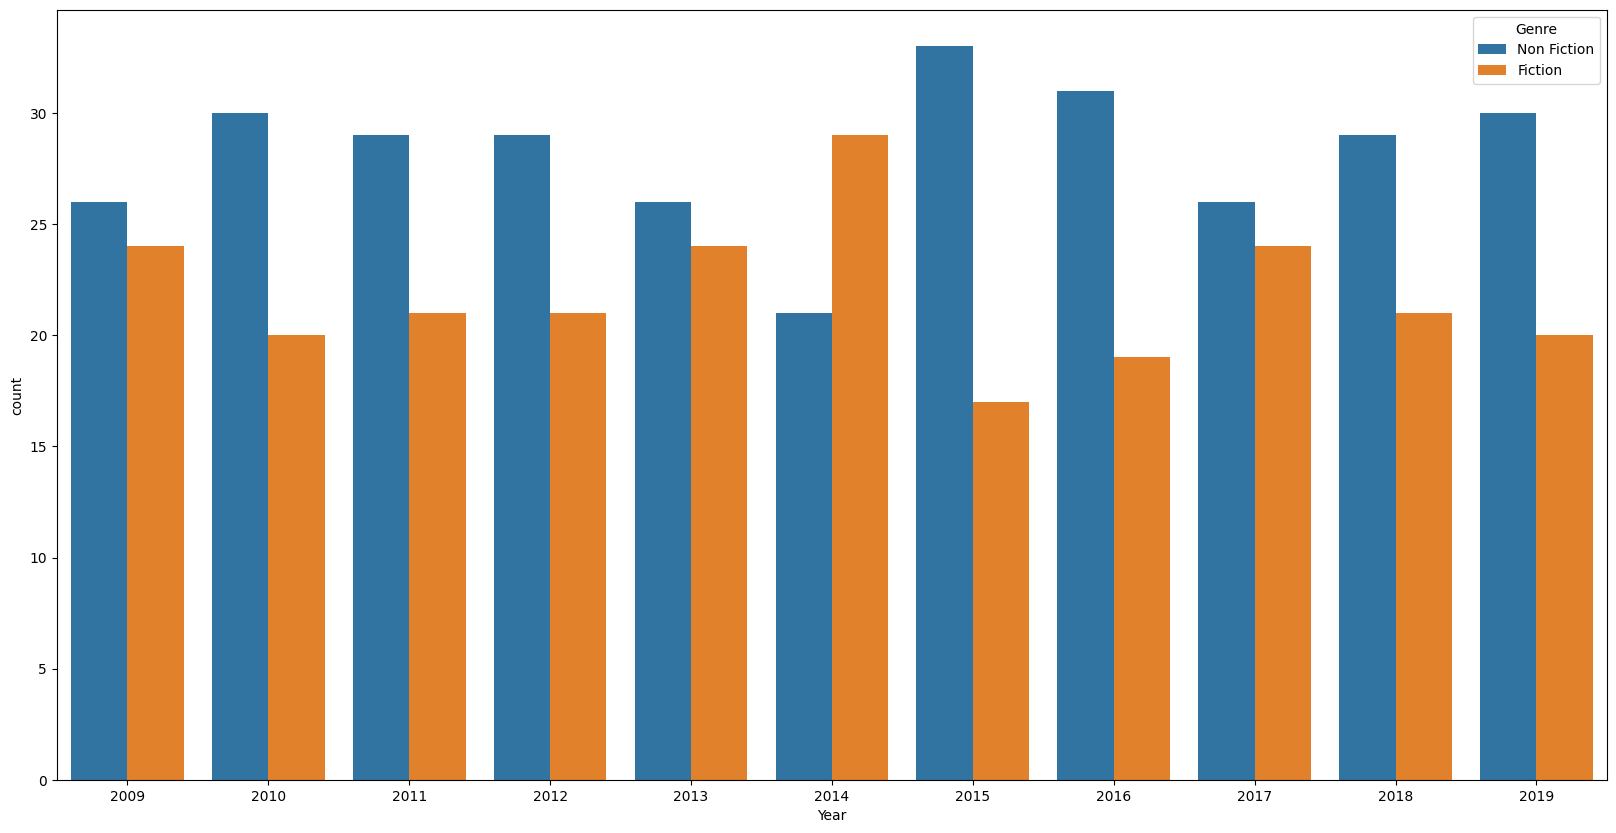

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=data,hue='Genre')

In [38]:
data['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [39]:
data['Author'].value_counts()[0:12]

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Dav Pilkey                             7
Bill O'Reilly                          7
Name: Author, dtype: int64

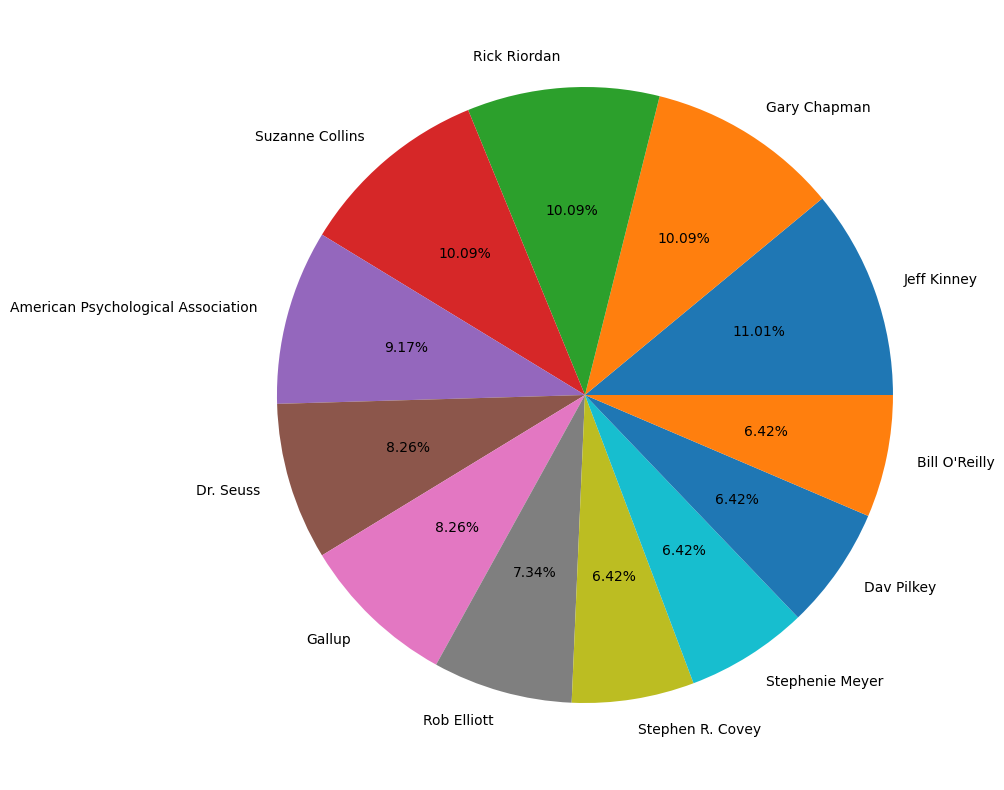

In [42]:
plt.figure(figsize=(15,10))
plt.pie(list(data['Author'].value_counts()[0:12]),labels=list(data['Author'].value_counts()[0:12].keys()),autopct='%0.2f%%')
plt.show()

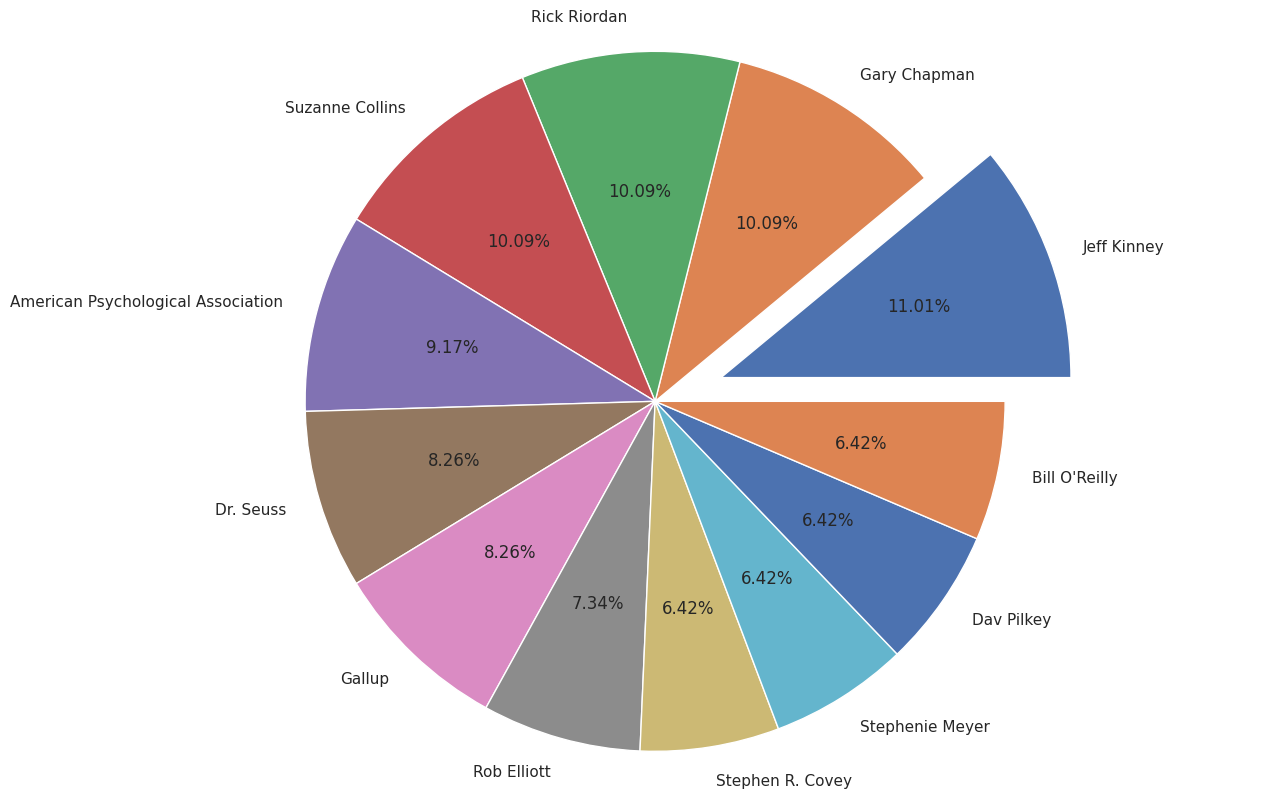

In [44]:
explode = (0.2,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,10))
plt.pie(list(data['Author'].value_counts()[0:12]),labels=list(data['Author'].value_counts()[0:12].keys()),autopct='%0.2f%%',explode=explode)
plt.axis('equal')
plt.show()

In [47]:
data['User Rating'].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.2     35
4.3     25
Name: User Rating, dtype: int64

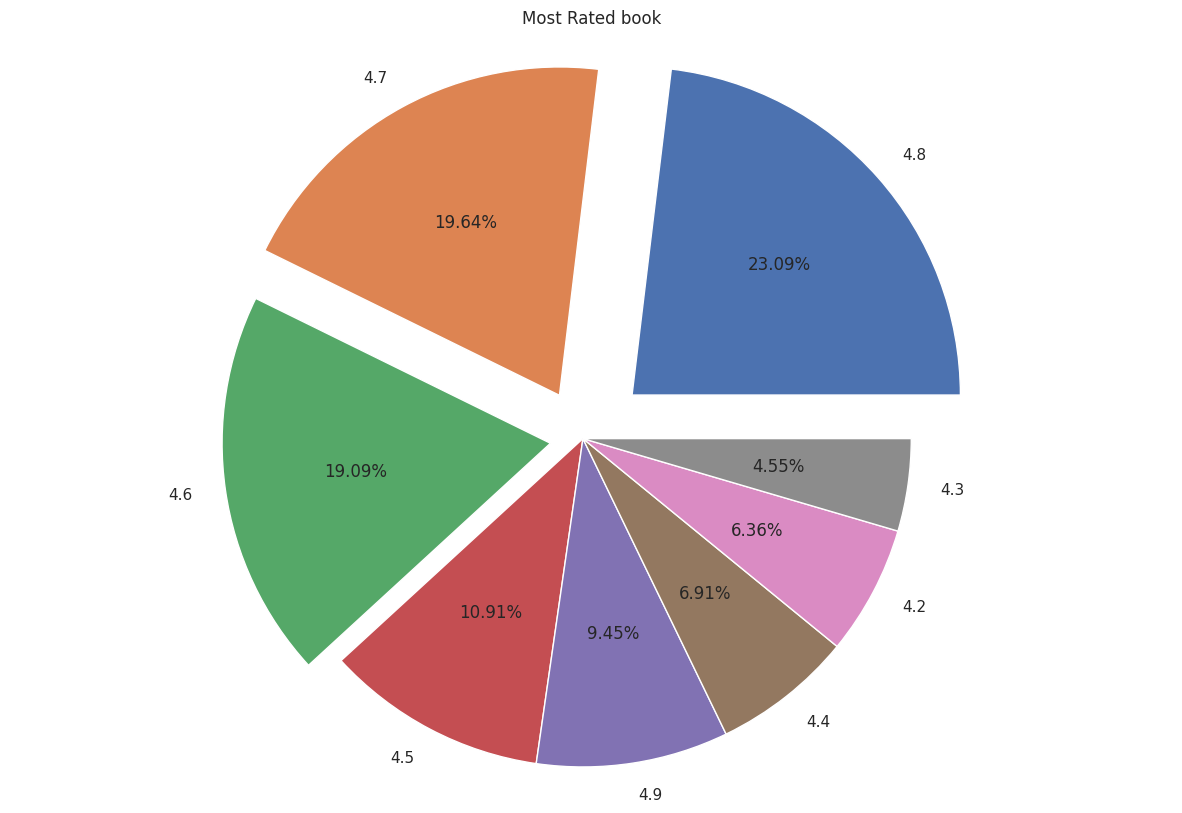

In [51]:
explode = (0.2,0.15,0.1,0,0,0,0,0)
plt.figure(figsize=(15,10))
plt.pie(list(data['User Rating'].value_counts()),labels=list(data['User Rating'].value_counts().keys()),autopct='%0.2f%%',explode=explode)
plt.axis('equal')
plt.title('Most Rated book')
plt.show()